### Importing Libraries and Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("merged_data_after_dummies.csv")
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [3]:
df = df.sample(frac=1)

In [4]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
12122,9.0,4.0,56.0,35.0,32.0,623719.0,28913.0,12957.0,17223.0,19621.0,...,5257.0,1727.0,0.0,1.0,24,0,0,1,1,0
12694,9.0,9.0,50.0,51.0,-350.0,1708770.0,340839.0,270293.0,106636.0,69849.0,...,147697.0,11390.0,1.0,0.0,24,0,0,1,1,0
8220,6.0,3.0,0.0,0.0,1373.0,1166364.0,474854.0,293521.0,471019.0,128501.0,...,415978.0,281948.0,0.0,1.0,24,0,0,1,0,1
8096,6.0,2.0,0.0,0.0,-2048.0,601177.0,113741.0,36715.0,17107.0,27132.0,...,158937.0,20150.0,0.0,0.0,24,0,0,1,0,1
204,0.0,1.0,44.0,51.0,32.0,1028511.0,204681.0,51497.0,87620.0,25237.0,...,41723.0,34720.0,0.0,1.0,25,0,0,1,0,1


### Feature selection

In [5]:
X = df.drop(columns=["Age","Ethnicity_Bengali","Ethnicity_English","Ethnicity_Han Chinese","Gender_F","Gender_M","user-definedlabeln","predefinedlabel"],axis=1)
y = df["user-definedlabeln"]

### Splitting training and test data

In [6]:
from sklearn.model_selection import train_test_split
### Splitting training and test data
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

### Fitting model using unscaled data

In [7]:
from sklearn.svm import SVC

np.random.seed(2)

classifier_unscaled = SVC(kernel="rbf")
classifier_unscaled.fit(X_train,y_train)

SVC()

In [8]:
classifier_unscaled.score(X_test,y_test)

0.5883730003901678

### Feature Scaling

In [14]:
data = df.drop(columns=["Age","Ethnicity_Bengali","Ethnicity_English","Ethnicity_Han Chinese","Gender_F","Gender_M","predefinedlabel"],axis=1)
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
12122,9.0,4.0,56.0,35.0,32.0,623719.0,28913.0,12957.0,17223.0,19621.0,147490.0,5257.0,1727.0,1.0
12694,9.0,9.0,50.0,51.0,-350.0,1708770.0,340839.0,270293.0,106636.0,69849.0,91769.0,147697.0,11390.0,0.0
8220,6.0,3.0,0.0,0.0,1373.0,1166364.0,474854.0,293521.0,471019.0,128501.0,959929.0,415978.0,281948.0,1.0
8096,6.0,2.0,0.0,0.0,-2048.0,601177.0,113741.0,36715.0,17107.0,27132.0,182342.0,158937.0,20150.0,0.0
204,0.0,1.0,44.0,51.0,32.0,1028511.0,204681.0,51497.0,87620.0,25237.0,88873.0,41723.0,34720.0,1.0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('user-definedlabeln',axis=1))
scaled_features = scaler.transform(data.drop('user-definedlabeln',axis=1))
data_scaled = pd.DataFrame(scaled_features,columns=data.columns[:-1])

X_scaled = data_scaled.loc[:,:'Gamma2']


X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=14)

In [16]:
data_scaled

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,1.574937,-0.134084,0.634334,-0.537745,-0.056148,0.028127,-0.569952,-0.392491,-0.273708,-0.122397,1.383020,-0.304868,-0.352141
1,1.574937,1.582290,0.375178,0.168498,-0.695053,1.729904,0.707778,3.160500,1.259652,1.186367,0.678253,1.479575,-0.083976
2,0.527912,-0.477359,-1.784458,-2.082651,2.186711,0.879203,1.256739,3.481205,7.508522,2.714631,11.658867,4.840513,7.424469
3,0.527912,-0.820633,-1.784458,-2.082651,-3.535004,-0.007228,-0.222475,-0.064469,-0.275697,0.073313,1.823833,1.620386,0.159129
4,-1.566138,-1.163908,0.116021,0.168498,-0.056148,0.662997,0.150039,0.139624,0.933543,0.023936,0.641624,0.151966,0.563471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,-0.519113,-0.477359,-1.784458,-2.082651,-0.260196,-0.620364,-0.508148,-0.332252,-0.219911,-0.551338,0.712099,-0.356808,-0.375147
12807,-0.868121,-0.820633,0.547948,1.007162,-0.016007,-0.938958,-0.657674,-0.447166,-0.473719,-0.486562,-0.442790,-0.309453,-0.340624
12808,0.178904,1.239015,-0.315906,-0.272904,-0.000955,0.356511,-0.564316,-0.414610,-0.427947,-0.430124,-0.448900,-0.341800,-0.373343
12809,-0.868121,0.209191,1.800537,1.316143,-0.047785,-0.912269,-0.624568,-0.392850,-0.433178,-0.394166,-0.333688,-0.333318,-0.312678


In [17]:
X_scaled

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,1.574937,-0.134084,0.634334,-0.537745,-0.056148,0.028127,-0.569952,-0.392491,-0.273708,-0.122397,1.383020,-0.304868,-0.352141
1,1.574937,1.582290,0.375178,0.168498,-0.695053,1.729904,0.707778,3.160500,1.259652,1.186367,0.678253,1.479575,-0.083976
2,0.527912,-0.477359,-1.784458,-2.082651,2.186711,0.879203,1.256739,3.481205,7.508522,2.714631,11.658867,4.840513,7.424469
3,0.527912,-0.820633,-1.784458,-2.082651,-3.535004,-0.007228,-0.222475,-0.064469,-0.275697,0.073313,1.823833,1.620386,0.159129
4,-1.566138,-1.163908,0.116021,0.168498,-0.056148,0.662997,0.150039,0.139624,0.933543,0.023936,0.641624,0.151966,0.563471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,-0.519113,-0.477359,-1.784458,-2.082651,-0.260196,-0.620364,-0.508148,-0.332252,-0.219911,-0.551338,0.712099,-0.356808,-0.375147
12807,-0.868121,-0.820633,0.547948,1.007162,-0.016007,-0.938958,-0.657674,-0.447166,-0.473719,-0.486562,-0.442790,-0.309453,-0.340624
12808,0.178904,1.239015,-0.315906,-0.272904,-0.000955,0.356511,-0.564316,-0.414610,-0.427947,-0.430124,-0.448900,-0.341800,-0.373343
12809,-0.868121,0.209191,1.800537,1.316143,-0.047785,-0.912269,-0.624568,-0.392850,-0.433178,-0.394166,-0.333688,-0.333318,-0.312678


### Fitting model using scaled data

In [18]:
from sklearn.svm import SVC

np.random.seed(2)

classifier = SVC(kernel="rbf")

classifier.fit(X_train_scaled,y_train)

SVC()

### Testing using scaled data

In [19]:
classifier.score(X_test_scaled,y_test)

0.6769410846664066

### Cross validation 

In [20]:
from sklearn.model_selection import cross_val_score

cross_validated_score = cross_val_score(classifier,X_scaled,y,cv=5,scoring=None)
cross_validated_score

array([0.66757706, 0.68657299, 0.68501171, 0.68891491, 0.68540203])

### Hyper parameter tuning using GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=  17.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=  25.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.685 total time=  17.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.680 total time=  14.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.682 total time=  29.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=  26.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=  20.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.658 total time=  16.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.646 total time=  15.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.655 total time=  16.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.599 total time=  18.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.841 total time=  10.8s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.834 total time=  12.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.836 total time=  15.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.832 total time=  10.9s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.759 total time=  47.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.774 total time=  49.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.777 total time=  50.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.770 total time=  50.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.781 total time=  52.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.686 total time=  21.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.691 total time=  20.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.689 total time=  17.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [23]:
# Accuracy
svc_Score = round(grid.score(X_test_scaled,y_test),2)
print("Accuracy of SVM classifier: ",svc_Score*100,"%")

Accuracy of SVM classifier:  84.0 %


In [24]:
y_preds = grid.predict(X_test_scaled)
y_preds

array([0., 1., 0., ..., 0., 0., 0.])

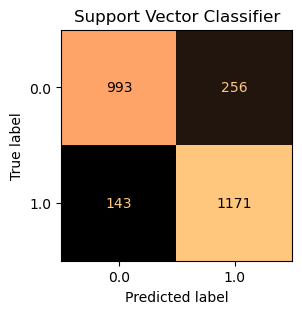

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
fig,ax = plt.subplots(figsize=(3,3))
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,colorbar=False,cmap="copper",ax=ax)
ax.set_title("Support Vector Classifier");

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83      1249
         1.0       0.82      0.89      0.85      1314

    accuracy                           0.84      2563
   macro avg       0.85      0.84      0.84      2563
weighted avg       0.85      0.84      0.84      2563



In [27]:
import pickle
filename = "svm_eeg_model.pkl"
pickle.dump(classifier,open(filename,'wb'))